# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Loads the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()



True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
#API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# reviews the response data from the API call
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18827262,
            "id": 1,
            "last_updated": 1632710950,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 830589925934,
                    "percent_change_1h": -0.288251344233824,
                    "percent_change_24h": 4.88975200176814,
                    "percent_change_7d": -6.59355786522799,
                    "percentage_change_1h": -0.288251344233824,
                    "percentage_change_24h": 4.88975200176814,
                    "percentage_change_7d": -6.59355786522799,
                    "price": 44248.0,
                    "volume_24h": 32000866779
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18827262,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# API call to access the current price ETH
eth_response = requests.get(eth_url).json()

#  Reviews the response data from the API call
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 117689996,
            "id": 1027,
            "last_updated": 1632710960,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 369129802984,
                    "percent_change_1h": -0.698388501107524,
                    "percent_change_24h": 9.60313031886645,
                    "percent_change_7d": -5.73788230519385,
                    "percentage_change_1h": -0.698388501107524,
                    "percentage_change_24h": 9.60313031886645,
                    "percentage_change_7d": -5.73788230519385,
                    "price": 3144.48,
                    "volume_24h": 25805677460
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 117689996,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigates the BTC response object to access the current price of BTC
#Bitcoin ID# is 1
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Prints the current price of BTC
print(btc_price)

44248.0


In [9]:
# Navigates the ETH response object to access the current price of ETH
#ETH ID# is 1027
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Prints the current price of ETH
print(eth_price)

3144.48


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Computes the current value of the BTC holding 
btc_value = btc_price * btc_coins
# Prints current value of your holding in BTC
print(btc_value)

53097.6


In [11]:
# Computes the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Prints current value of your holding in ETH
print(eth_value)

16665.744


In [12]:
# Computes the total value of the cryptocurrency wallet
# by adding the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Prints current cryptocurrency wallet balance
print(total_crypto_wallet)

69763.344


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Sets the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Creates the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Sets the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Sets timeframe to 1D 
timeframe= "1D"

# Formats current date as ISO format
start_date = pd.Timestamp("2021-09-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-09-24", tz="America/New_York").isoformat()



#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
#  Gets current closing prices the portfolio
# and formats the response object as a DataFrame
stockbond_portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end= end_date
).df

# Reviews the first 5 rows of the Alpaca DataFrame
stockbond_portfolio_df.head()


AGG                                         SPY  \
                            open      high      low   close   volume    open   
time                                                                           
2021-09-24 00:00:00-04:00  115.5  115.5055  115.319  115.41  3388185  441.44   

                                                             
                             high     low   close    volume  
time                                                         
2021-09-24 00:00:00-04:00  444.67  441.21  443.92  52199034

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Accesses the closing price for AGG from the Alpaca DataFrame
# by converting the value to a floating point number
agg_close_price = stockbond_portfolio_df["AGG"]["close"][0]

print(agg_close_price)


115.41


In [18]:
# Accesses the closing price for SPY from the Alpaca DataFrame
# by converting the value to a floating point number
spy_close_price = stockbond_portfolio_df["SPY"]["close"][0]

# Print the SPY closing price
print(spy_close_price)

443.92


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculates the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Prints the current value of the bond portfolio
print(agg_value)

23082.0


In [20]:
# Calculates the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares
spy_value= spy_value
# Prints the current value of the stock portfolio
print(f"{spy_value:.2f}")


48831.20


In [21]:
# Calculates the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Prints the current balance of the stock and bond portion of the portfolio
print(f"{total_stocks_bonds: .2f}") 



 71913.20


In [22]:
# Calculates the total value of the member's entire savings portfolio
# by adding the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Prints total portfolio balance
print(int(float(total_portfolio)))


141676


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidates financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

#sets amount parameter for Pandas DataFrame
amount=["amount"]

# Prints the Python list savings_data
print(savings_data)
    

[69763.344, 71913.20000000001]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Creates a Pandas DataFrame called savings_df 
saving_df = pd.DataFrame(savings_data, columns=amount, index=["crypto", "stock/bond"])

# Displays the savings_df DataFrame
display(saving_df)


,amount
crypto,69763.344
stock/bond,71913.200


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Cryptocurrency and Stocks/Bonds Proportions'}, ylabel='amount'>

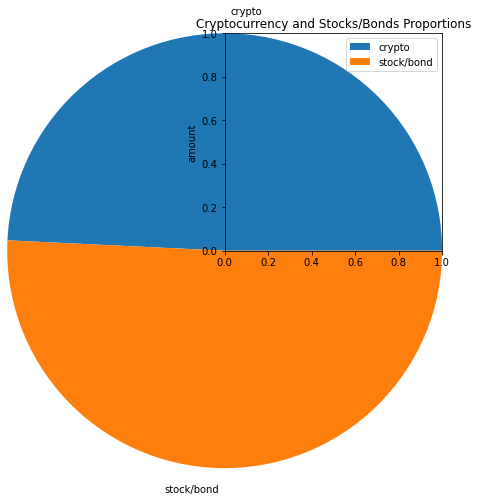

In [40]:
# Plots the total value of the member's portfolio (crypto and stock/bond) in a pie chart
saving_df.plot(kind="pie", y="amount", title="Cryptocurrency and Stocks/Bonds Proportions", frame=True)

#I couldn't figure out how to change the background color of the pie chart. It would only print with a transparent background
#this is the only way I could get it to show a white background
#Will ask instructor and update if I get an answer

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [58]:
# Creates a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [59]:
# Evaluates the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have more than enough money for an emergency fund!")
elif total_portfolio == emergency_fund_value:
    print("Congratulations! You have reached your financial goal!")
elif total_portfolio < emergency_fund_value:
    print(f"You are ${emergency_fund_value - total_portfolio} away from your goal.")



Congratulations! You have more than enough money for an emergency fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [65]:
# Sets start and end dates of 3 years back from your current date 
start_date_3year = pd.Timestamp("2018-09-24", tz ="America/New_York").isoformat()
end_date_3year= pd.Timestamp("2021-09-24", tz="America/New_York").isoformat()


# Sets number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [67]:
# Uses the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data

portfolio_mc_df = alpaca.get_barset(
    tickers,
    timeframe,
    start= start_date_3year,
    end = end_date_3year,
    limit = limit_rows
).df


# Displays both the first and last five rows of the DataFrame
display(portfolio_mc_df.head())
display(portfolio_mc_df.tail())


AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2018-09-24 00:00:00-04:00  105.33  105.46  105.3101  105.350  1771301.0   
2018-09-25 00:00:00-04:00  105.25  105.30  105.1800  105.290  1863777.0   
2018-09-26 00:00:00-04:00  105.37  105.60  105.3350  105.560  2626493.0   
2018-09-27 00:00:00-04:00  105.50  105.64  105.5000  105.625  2252805.0   
2018-09-28 00:00:00-04:00  105.69  105.71  105.5100  105.520  3859908.0   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2018-09-24 00:00:00-04:00  291.34  291.50  290.3700  291.07  37585070  
2018-09-25 00:00:00-04:00  291.53  291.65  290.4833  290.70  30128907  
2018-09-26 00:00:00-04:00  290.92  292.24  289.4100  289.84  53536102  
2018-09-27 00:00:00-04:00  290.44  291.91  290.1000  290.65  42099964  
2018-09-28 00:00:00-04:00  289.99  291.28  289.9500  290.61  49399177

AGG                                         \
                             open      high      low    close     volume   
time                                                                       
2021-09-20 00:00:00-04:00  116.02  116.1700  115.975  116.120  4463038.0   
2021-09-21 00:00:00-04:00  116.13  116.1700  116.045  116.135  4455403.0   
2021-09-22 00:00:00-04:00  116.11  116.2500  116.005  116.190  6079965.0   
2021-09-23 00:00:00-04:00  115.93  115.9400  115.570  115.570  7516613.0   
2021-09-24 00:00:00-04:00  115.50  115.5055  115.319  115.410  3388185.0   

                              SPY                                      
                             open    high      low   close     volume  
time                                                                   
2021-09-20 00:00:00-04:00  434.88  436.56  428.860  434.07  149948277  
2021-09-21 00:00:00-04:00  436.53  437.91  433.070  433.67   82418070  
2021-09-22 00:00:00-04:00  436.05  440.03  433.747  437.83   91135278  
2021-09-23 00:00:00-04:00  439.84  444.89  439.600  443.13   67408294  
2021-09-24 00:00:00-04:00  441.44  444.67  441.210  443.92   52199034

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [99]:
# Configures the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Running 500 samples
mc_thirtyyear = MCSimulation(
    portfolio_data = portfolio_mc_df,
    weights = [.40,.60],
    num_simulation=500,
    num_trading_days=252*30
)

# Reviews the simulation input data
mc_thirtyyear.portfolio_data.head()


AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2018-09-24 00:00:00-04:00  105.33  105.46  105.3101  105.350  1771301.0   
2018-09-25 00:00:00-04:00  105.25  105.30  105.1800  105.290  1863777.0   
2018-09-26 00:00:00-04:00  105.37  105.60  105.3350  105.560  2626493.0   
2018-09-27 00:00:00-04:00  105.50  105.64  105.5000  105.625  2252805.0   
2018-09-28 00:00:00-04:00  105.69  105.71  105.5100  105.520  3859908.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2018-09-24 00:00:00-04:00          NaN  291.34  291.50  290.3700  291.07   
2018-09-25 00:00:00-04:00    -0.000570  291.53  291.65  290.4833  290.70   
2018-09-26 00:00:00-04:00     0.002564  290.92  292.24  289.4100  289.84   
2018-09-27 00:00:00-04:00     0.000616  290.44  291.91  290.1000  290.65   
2018-09-28 00:00:00-04:00    -0.000994  289.99  291.28  289.9500  290.61   

                                                  
                             volume daily_return  
time                                              
2018-09-24 00:00:00-04:00  37585070          NaN  
2018-09-25 00:00:00-04:00  30128907    -0.001271  
2018-09-26 00:00:00-04:00  53536102    -0.002958  
2018-09-27 00:00:00-04:00  42099964     0.002795  
2018-09-28 00:00:00-04:00  49399177    -0.000138

In [77]:
# Runs the Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003093,0.991194,0.996707,1.008092,1.007925,0.981712,0.995824,1.002348,1.021946,1.005579,...,1.000900,0.993787,0.998347,1.003461,1.011056,0.995343,1.017129,0.998130,1.010932,0.989160
2,1.000212,0.979524,0.989914,1.027593,1.014474,0.979776,1.006246,0.998507,1.026537,1.015036,...,0.989425,0.983043,1.006187,1.011682,1.013925,0.995085,1.018432,1.005832,1.011281,0.972903
3,0.991145,0.970358,0.977497,1.032449,1.008388,0.972222,0.998880,1.012884,1.026431,1.014604,...,0.988786,0.990890,1.002784,1.013803,1.013591,1.001457,1.022452,1.008860,1.010819,0.976958
4,0.987713,0.980293,0.977575,1.022371,1.024898,0.966490,1.011942,1.003063,1.025104,1.002037,...,0.977651,0.989712,0.999583,1.016517,1.007369,0.999475,1.028908,1.006969,1.020235,0.974559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.481941,17.285735,30.536691,41.225985,23.078815,14.879880,23.906002,64.062294,116.181903,13.000520,...,5.502610,20.552497,11.716105,33.921657,52.908724,34.547730,23.958273,4.299487,8.417152,11.723506
7557,13.725251,17.335294,30.885921,41.418394,23.340968,14.856828,23.841808,64.448863,115.689444,13.173030,...,5.540419,20.811424,11.844743,33.619178,52.994994,34.422628,23.900799,4.304696,8.445544,11.832620
7558,13.599276,17.300178,31.185356,41.648159,23.159498,14.773620,23.850626,65.366312,116.396026,13.319390,...,5.588346,20.676355,11.772779,33.716085,53.408959,33.758665,24.103830,4.265864,8.549509,11.802047
7559,13.770587,17.532376,31.321559,42.163057,22.859953,14.780545,23.949202,65.827230,114.895941,13.177031,...,5.573910,20.620124,11.804809,33.487801,53.059399,33.517612,24.031634,4.332065,8.501504,11.756675


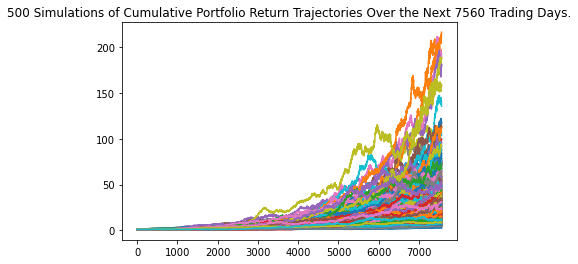

In [90]:
# Visualizes the 30-year Monte Carlo simulation by creating an
# overlay line plot
mc_thirty_plot = mc_thirtyyear.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

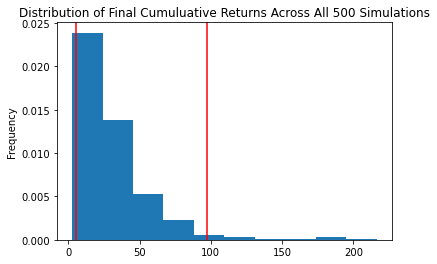

In [91]:
# Visualizes the probability distribution of the 30-year Monte Carlo simulation 
mc_thirty_dis = mc_thirtyyear.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [94]:
# Generates summary statistics from the 30-year Monte Carlo simulation results
mc_thirtyyear_summary = mc_thirtyyear.summarize_cumulative_return()



# Reviews the 30-year Monte Carlo summary statistics
print(mc_thirtyyear_summary)

count           500.000000
mean             31.384843
std              27.255371
min               2.693566
25%              14.745982
50%              23.756807
75%              39.081311
max             216.265221
95% CI Lower      5.574124
95% CI Upper     97.133880
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [96]:
# Prints the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stocks/bonds portfolio is {total_stocks_bonds:.2f}.")

The current balance of the stocks/bonds portfolio is 71913.20


In [98]:
# Uses the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = mc_thirtyyear_summary[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = mc_thirtyyear_summary[9] * total_stocks_bonds

# Prints the result of your calculations
print(f"The possible return for the stocsk/bonds portfolio is between ${ci_lower_thirty_cumulative_return:.2f} and ${ci_upper_thirty_cumulative_return:.2f}.")

The possible return for the stocsk/bonds portfolio is between $400853.11 and $6985208.14


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [100]:
# Configures a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Runs 500 samples.
mc_tenyear = MCSimulation(
    portfolio_data = portfolio_mc_df,
    weights = [.20,.80],
    num_simulation=500,
    num_trading_days=252*10
)

# Reviews the simulation input data
mc_tenyear.portfolio_data.head()



AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2018-09-24 00:00:00-04:00  105.33  105.46  105.3101  105.350  1771301.0   
2018-09-25 00:00:00-04:00  105.25  105.30  105.1800  105.290  1863777.0   
2018-09-26 00:00:00-04:00  105.37  105.60  105.3350  105.560  2626493.0   
2018-09-27 00:00:00-04:00  105.50  105.64  105.5000  105.625  2252805.0   
2018-09-28 00:00:00-04:00  105.69  105.71  105.5100  105.520  3859908.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2018-09-24 00:00:00-04:00          NaN  291.34  291.50  290.3700  291.07   
2018-09-25 00:00:00-04:00    -0.000570  291.53  291.65  290.4833  290.70   
2018-09-26 00:00:00-04:00     0.002564  290.92  292.24  289.4100  289.84   
2018-09-27 00:00:00-04:00     0.000616  290.44  291.91  290.1000  290.65   
2018-09-28 00:00:00-04:00    -0.000994  289.99  291.28  289.9500  290.61   

                                                  
                             volume daily_return  
time                                              
2018-09-24 00:00:00-04:00  37585070          NaN  
2018-09-25 00:00:00-04:00  30128907    -0.001271  
2018-09-26 00:00:00-04:00  53536102    -0.002958  
2018-09-27 00:00:00-04:00  42099964     0.002795  
2018-09-28 00:00:00-04:00  49399177    -0.000138

In [101]:
# Runs the Monte Carlo simulation to forecast 10 years cumulative returns
mc_tenyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014085,1.007123,1.001106,1.011695,0.994929,0.977694,0.992772,1.013514,1.021739,0.993617,...,0.975862,1.003041,0.979193,1.004267,0.988800,1.008382,1.002345,0.991954,0.996696,1.010822
2,1.008847,1.015955,0.989802,1.012610,1.000216,0.967165,0.988195,1.016442,1.003452,0.988939,...,0.964608,0.997128,0.995265,0.995582,0.986297,1.007838,1.004751,0.991352,0.988837,1.020891
3,1.008897,1.021923,0.993760,1.026525,1.003134,0.973690,0.988437,1.022563,1.006766,0.969460,...,0.965970,0.993598,1.007419,0.999491,0.993596,0.983878,0.986665,0.994492,0.998748,1.020620
4,1.014930,1.002525,0.982906,1.014543,1.003640,1.000727,0.969922,1.022367,0.998233,0.971335,...,0.954411,0.985762,1.021263,0.984865,0.992915,0.989509,0.984541,0.995143,0.984160,1.011178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.676871,2.161781,3.557506,2.090098,5.524935,3.882731,1.830584,4.572591,5.189068,6.361095,...,3.680282,3.082890,1.720385,4.754273,8.852745,0.920298,4.620631,8.073044,2.569982,2.365093
2517,3.649961,2.193383,3.583922,2.109066,5.474017,3.863016,1.814974,4.601727,5.164987,6.319876,...,3.739525,3.101328,1.718698,4.691119,8.883631,0.922402,4.615018,8.093106,2.582921,2.387066
2518,3.667364,2.162179,3.588086,2.124811,5.461558,3.913806,1.837435,4.558707,5.099060,6.325532,...,3.755038,3.143300,1.724172,4.646327,8.820864,0.922241,4.651249,8.015001,2.582923,2.399868
2519,3.646037,2.156196,3.510603,2.123907,5.445049,3.837522,1.865652,4.609479,5.146405,6.334348,...,3.742975,3.187367,1.713835,4.674647,8.740008,0.921276,4.622998,7.784034,2.554257,2.386363


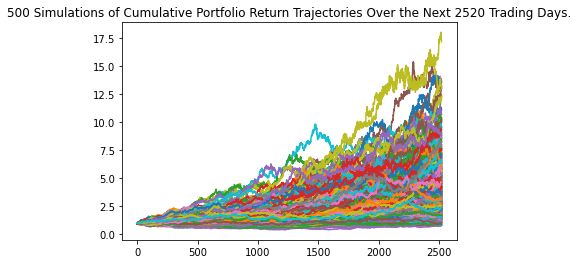

In [102]:
# Visualizes the 10-year Monte Carlo simulation by creating an
# overlay line plot
mc_ten_plot = mc_tenyear.plot_simulation()


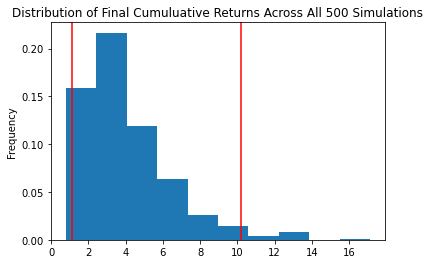

In [103]:
# Visualizes the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
mc_ten_dis = mc_tenyear.plot_distribution()


In [104]:
# Generates summary statistics from the 10-year Monte Carlo simulation results
# and saves the results as a variable
mc_tenyear_summary = mc_tenyear.summarize_cumulative_return()



# Review the 10-year Monte Carlo summary statistics
print(mc_tenyear_summary)

count           500.000000
mean              4.040873
std               2.408135
min               0.785261
25%               2.387938
50%               3.484882
75%               5.123808
max              17.125987
95% CI Lower      1.119426
95% CI Upper     10.203042
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [106]:
# Prints the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stocks/bonds portfolio is {total_stocks_bonds:.2f}.")

The current balance of the stocks/bonds portfolio is 71913.20.


In [105]:
# Uses the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = mc_tenyear_summary[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = mc_tenyear_summary[9] * total_stocks_bonds

# Prints the result of your calculations

print(f"The possible return for the stocsk/bonds portfolio is between ${ci_lower_ten_cumulative_return:.2f} and ${ci_upper_ten_cumulative_return:.2f}.")

The possible return for the stocsk/bonds portfolio is between $80501.53 and $733733.38


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?